## Importando as bibliotecas iniciais

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

## Lendo os dados

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Explicação das colunas

1 - age (numeric) : idade do cliente

2 - job : tipo de trabalho do cliente (categórico)

3 - marital : estado civil do cliente (categórico)

4 - education (categórico) : nível de educação do cliente

5 - default: tem crédito em default? (categórico)

6 - housing: tem empréstimo imobiliário? (categórico)

7 - loan: tem empréstimo pessoal? (categórico)

8 - contact: tipo de comunicação do contato (categórico)

9 - month: mês do último contato (categórico)

10 - day_of_week: dia da semana do último contato (categórico)

11 - duration: duração do último contato, em segundos (numérico).

Nota: esse atributo afeta muito o target output (por exemplo, se duration=0, y='no'). No entanto, a duração não é conhecida antes de uma chamada ser realizada. Além disso, após o fim da chamada, "y" é obviamente conhecido. Assim, essa entrada deve ser incluída apenas para fins de benchmark 

12 - campaign: número de contatos realizados durante esta campanha e para este cliente (numérico, incluindo o último contato)

13 - pdays: número de dias que passaram após o último contato para este cliente (numérico; 999 significa que o cliente não foi contatado anteriormente)

14 - previous: número de contatos realizados antes desta campanha e para este cliente (numérico)

15 - poutcome: resultado da campanha de marketing anterior (categórico)

16 - emp.var.rate: taxa de variação do emprego - indicador trimestral (numérico)

17 - cons.price.idx: índice de preços ao consumidor - indicador mensal (numérico)

18 - cons.conf.idx: índice de confiança do consumidor - indicador mensal (numérico)

19 - euribor3m: taxa euribor a 3 meses - indicador diário (numérico)

20 - nr.employed: número de empregados - indicador trimestral (numérico)

21 - y - tem o cliente assinado um depósito a prazo? (binário)



## Verificação de valores faltantes


In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Renomeando váriavel Y

In [5]:
# Antes vamos fazer uma cópia do dataframe original
df_copy = df.copy()

# renomear a coluna y para status
df_copy.rename(columns={'y': 'status'}, inplace=True)

## Separando variáveis em categóricas e numéricas

In [6]:
cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'status']

num = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
       'euribor3m', 'nr.employed']

## Removendo valores desconhecidos da base

In [7]:
df_copy = df_copy[df_copy['job'] != 'unknown']
df_copy = df_copy[df_copy['education'] != 'unknown']
df_copy = df_copy[df_copy['contact'] != 'unknown']

## Fazendo encoding de variavéis

Vamos transformar as variáveis categóricas em numéricas, para isso vamos usar o método get_dummies do pandas, para criar um novo dataframe com as variáveis categóricas já transformadas

In [8]:
df_final = pd.get_dummies(df_copy, columns=cat, drop_first=True)
df_final = df_final.astype(float)

In [9]:
df_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,status_yes
0,56.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,57.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Elbow method

O método do cotovelo (elbow method) é uma técnica utilizada na clusterização para determinar o número ideal de clusters em um conjunto de dados. A ideia é executar o algoritmo de clusterização, como o K-means, para diferentes valores de k (número de clusters) e avaliar a inércia (WCSS - Within-Cluster Sum of Squares) ou a variância explicada. O ponto em que a diminuição na inércia começa a desacelerar, formando um "cotovelo" no gráfico, é considerado o número ideal de clusters. Esse método proporciona uma abordagem visual e objetiva para escolher o número mais apropriado de clusters, contribuindo para a eficácia da clusterização e interpretação dos resultados.

C:\Users\Dom Ruan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dom Ruan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dom Ruan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

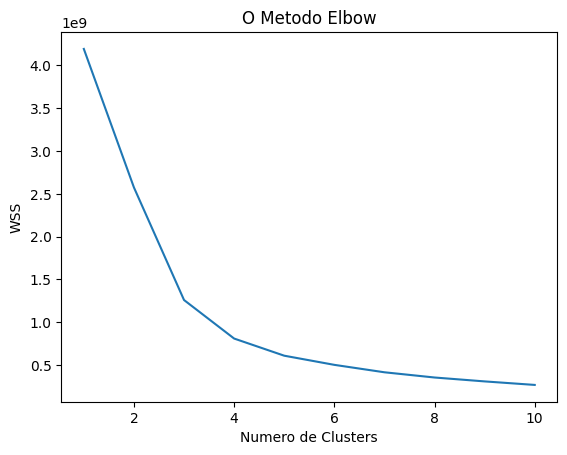

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, random_state=RANDOM_SEED)
    kmeans.fit(df_final)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS')
plt.show()

# Número de clusters ideial usando distancia euclidiana

In [11]:
x1, y1 = 2, wcss[0]
x2, y2 = 20, wcss[len(wcss)-1]

distances = []
for i in range(len(wcss)):
    x0 = i+2
    y0 = wcss[i]
    numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominator = ((y2 - y1)**2 + (x2 - x1)**2)**(1/2)
    distances.append(numerator/denominator)

n_cluster = distances.index(max(distances)) + 2
print('Numero de Clusters:', n_cluster)

Numero de Clusters: 5


## Pré processamento

Iremos normalizar os dados e encontrar os componentes mais importantes das features e após isso aplicaremos nosso modelo (K-means)

C:\Users\Dom Ruan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


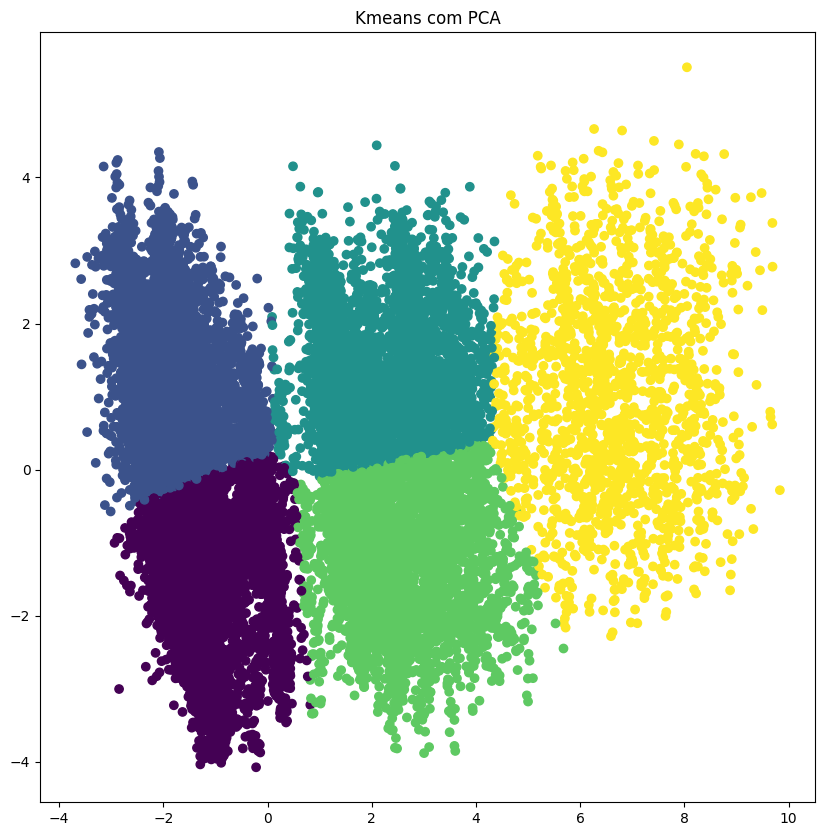

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# pca
pca = PCA(n_components=2)

# Normalizar os dados
scaler = StandardScaler()

# Aplique o K-means aos dados normalizados
kmeans = KMeans(n_clusters=n_cluster, random_state=42)

X = df_final.copy()

# criar o pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca)
])

# fit_transform
X_pca = pipeline.fit_transform(X)

# fit
kmeans.fit(X_pca)

# predict
y_pred = kmeans.predict(X_pca)

# plotar o gráfico
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.title('Kmeans com PCA')
plt.show()

    

## Adicionando uma nova coluna

Após a aplicação do K-means, temos a variável y_pred que contém os clusters de cada cliente, vamos adicionar essa variável ao nosso dataframe original

In [13]:
df_final['cluster'] = y_pred
df_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,status_yes,cluster
0,56.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,57.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,56.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1


Vamos entender as caracteristicas de cada cluster, para isso vamos usar o método groupby do pandas

In [14]:
df_final.groupby('cluster').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,status_yes
cluster,,,,,,,,,,,,,,,,,,,,,
0,37.432244,245.788107,2.803699,999.000000,0.000000,1.103309,93.671117,-39.531498,4.802303,5218.242719,...,0.172997,0.002156,0.000000,0.191906,0.229640,0.201277,0.208907,1.000000,0.000000,0.048018
1,42.249553,254.889104,2.860077,999.000000,0.000000,1.202486,94.029756,-39.219507,4.872868,5210.264558,...,0.042126,0.000893,0.000000,0.204748,0.185174,0.203334,0.205865,1.000000,0.000000,0.039372
2,43.301896,263.204782,2.140643,996.375763,0.366364,-1.797758,93.021941,-44.461979,1.429905,5091.437840,...,0.074361,0.026711,0.019786,0.224897,0.194229,0.178730,0.192086,0.659522,0.002638,0.135697
3,35.038487,267.750000,2.082449,997.019741,0.283676,-1.919476,92.988615,-42.450730,1.435870,5086.051493,...,0.114964,0.038487,0.029197,0.224784,0.232250,0.180657,0.172362,0.734074,0.001991,0.234406
4,43.020946,319.351287,1.799521,181.312986,1.657092,-2.247516,93.262442,-37.251466,0.905207,5024.340455,...,0.110114,0.149013,0.131658,0.202873,0.226810,0.214841,0.187313,0.004189,0.746260,0.613405


## Separando o Dataframe por cluster

In [15]:
# Vamos usar o método copy do pandas
df_cluster_0 = df_final[df_final['cluster'] == 0].copy()
df_cluster_1 = df_final[df_final['cluster'] == 1].copy()
df_cluster_2 = df_final[df_final['cluster'] == 2].copy()
df_cluster_3 = df_final[df_final['cluster'] == 3].copy()
df_cluster_4 = df_final[df_final['cluster'] == 4].copy()

# Vamos remover a coluna cluster
df_cluster_0.drop('cluster', axis=1, inplace=True)
df_cluster_1.drop('cluster', axis=1, inplace=True)
df_cluster_2.drop('cluster', axis=1, inplace=True)
df_cluster_3.drop('cluster', axis=1, inplace=True)
df_cluster_4.drop('cluster', axis=1, inplace=True)

## Analisando graficamente cada cluster

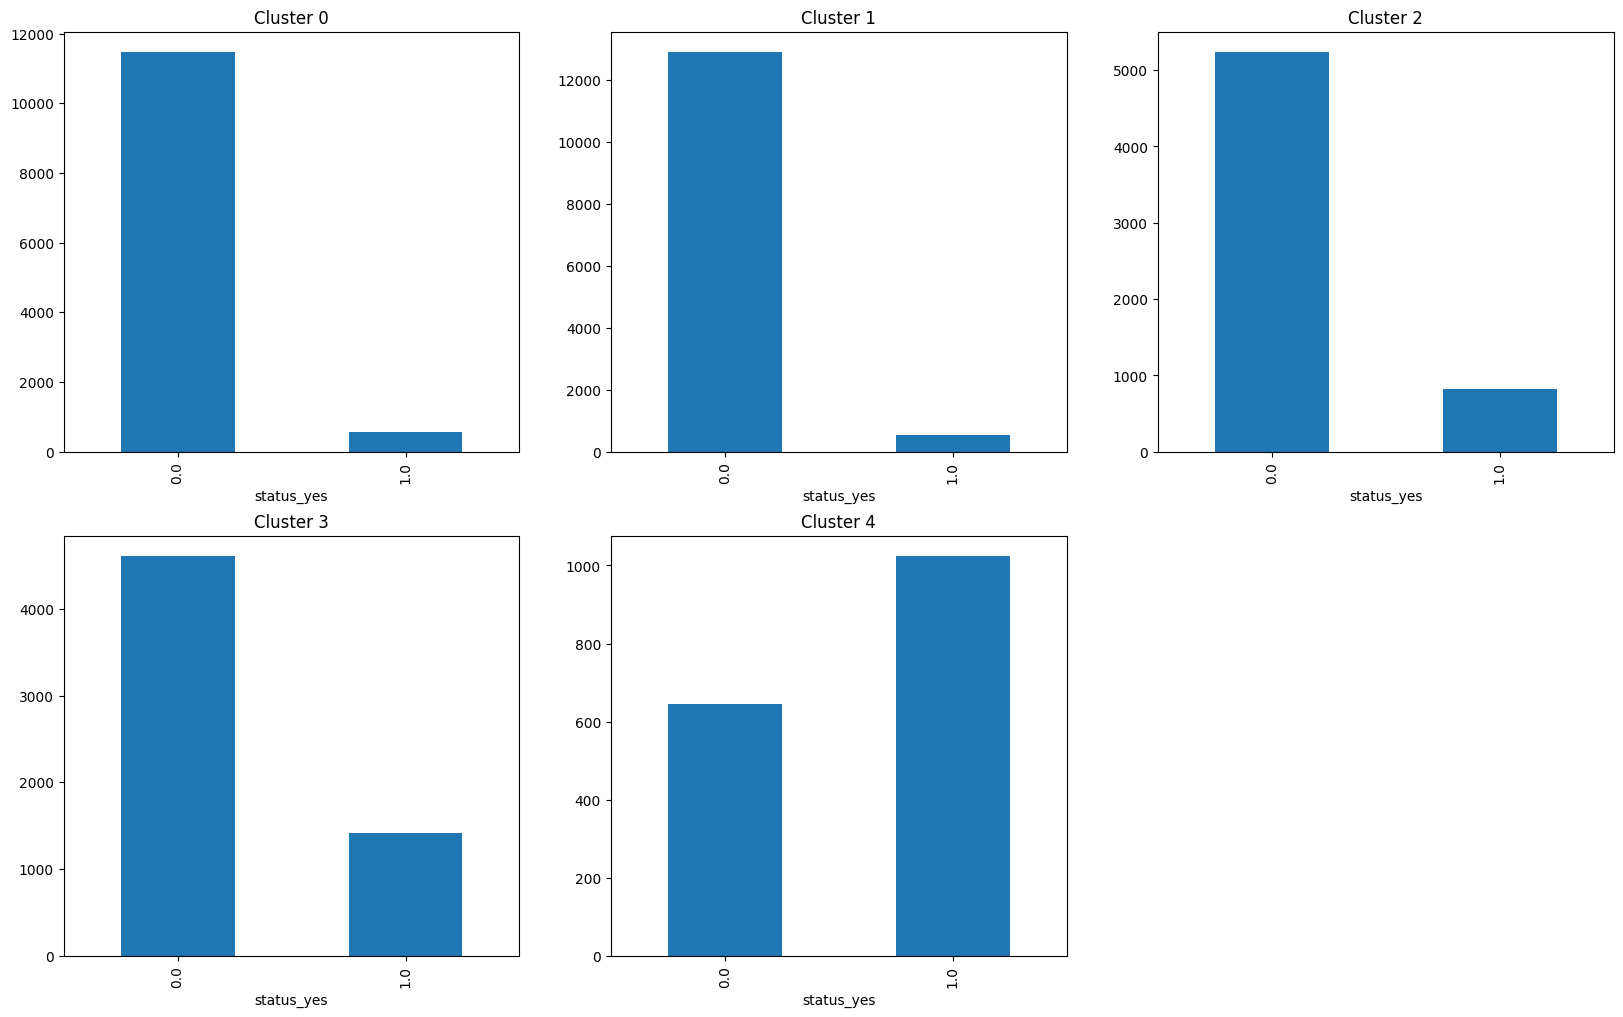

In [16]:
# vamos usar o método plot do pandas

plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
plt.title('Cluster 0')
df_cluster_0.groupby('status_yes').size().plot.bar()

plt.subplot(2, 3, 2)
plt.title('Cluster 1')
df_cluster_1.groupby('status_yes').size().plot.bar()

plt.subplot(2, 3, 3)
plt.title('Cluster 2')
df_cluster_2.groupby('status_yes').size().plot.bar()

plt.subplot(2, 3, 4)
plt.title('Cluster 3')
df_cluster_3.groupby('status_yes').size().plot.bar()

plt.subplot(2, 3, 5)
plt.title('Cluster 4')
df_cluster_4.groupby('status_yes').size().plot.bar()

plt.show()

Analisando cada cluster vemos que os cliente do cluster 4, proporcionalmente, tendem a assinar mais depósitos a prazo que outros clientes.

In [17]:
# função para plotar o gráfico de barras media de cada cluster
def plot_cluster_bar(column):
    if column == 'emp.var.rate' or column == 'cons.conf.idx':
        plt.bar(0, abs(df_cluster_0[column].mean()), color='green', label='Cluster 0', alpha=0.5)
        plt.bar(1, abs(df_cluster_1[column].mean()), color='red', label='Cluster 1', alpha=0.5)
        plt.bar(2, abs(df_cluster_2[column].mean()), color='blue', label='Cluster 2', alpha=0.5)
        plt.bar(3, abs(df_cluster_3[column].mean()), color='yellow', label='Cluster 3', alpha=0.5)
        plt.bar(4, abs(df_cluster_4[column].mean()), color='orange', label='Cluster 4', alpha=0.5)
        plt.title('Média de {}(módulo)'.format(column))
    else:
        plt.bar(0, df_cluster_0[column].mean(), color='green', label='Cluster 0', alpha=0.5)
        plt.bar(1, df_cluster_1[column].mean(), color='red', label='Cluster 1', alpha=0.5)
        plt.bar(2, df_cluster_2[column].mean(), color='blue', label='Cluster 2', alpha=0.5)
        plt.bar(3, df_cluster_3[column].mean(), color='yellow', label='Cluster 3', alpha=0.5)
        plt.bar(4, df_cluster_4[column].mean(), color='orange', label='Cluster 4', alpha=0.5)

        plt.title('Média de {}'.format(column))
     

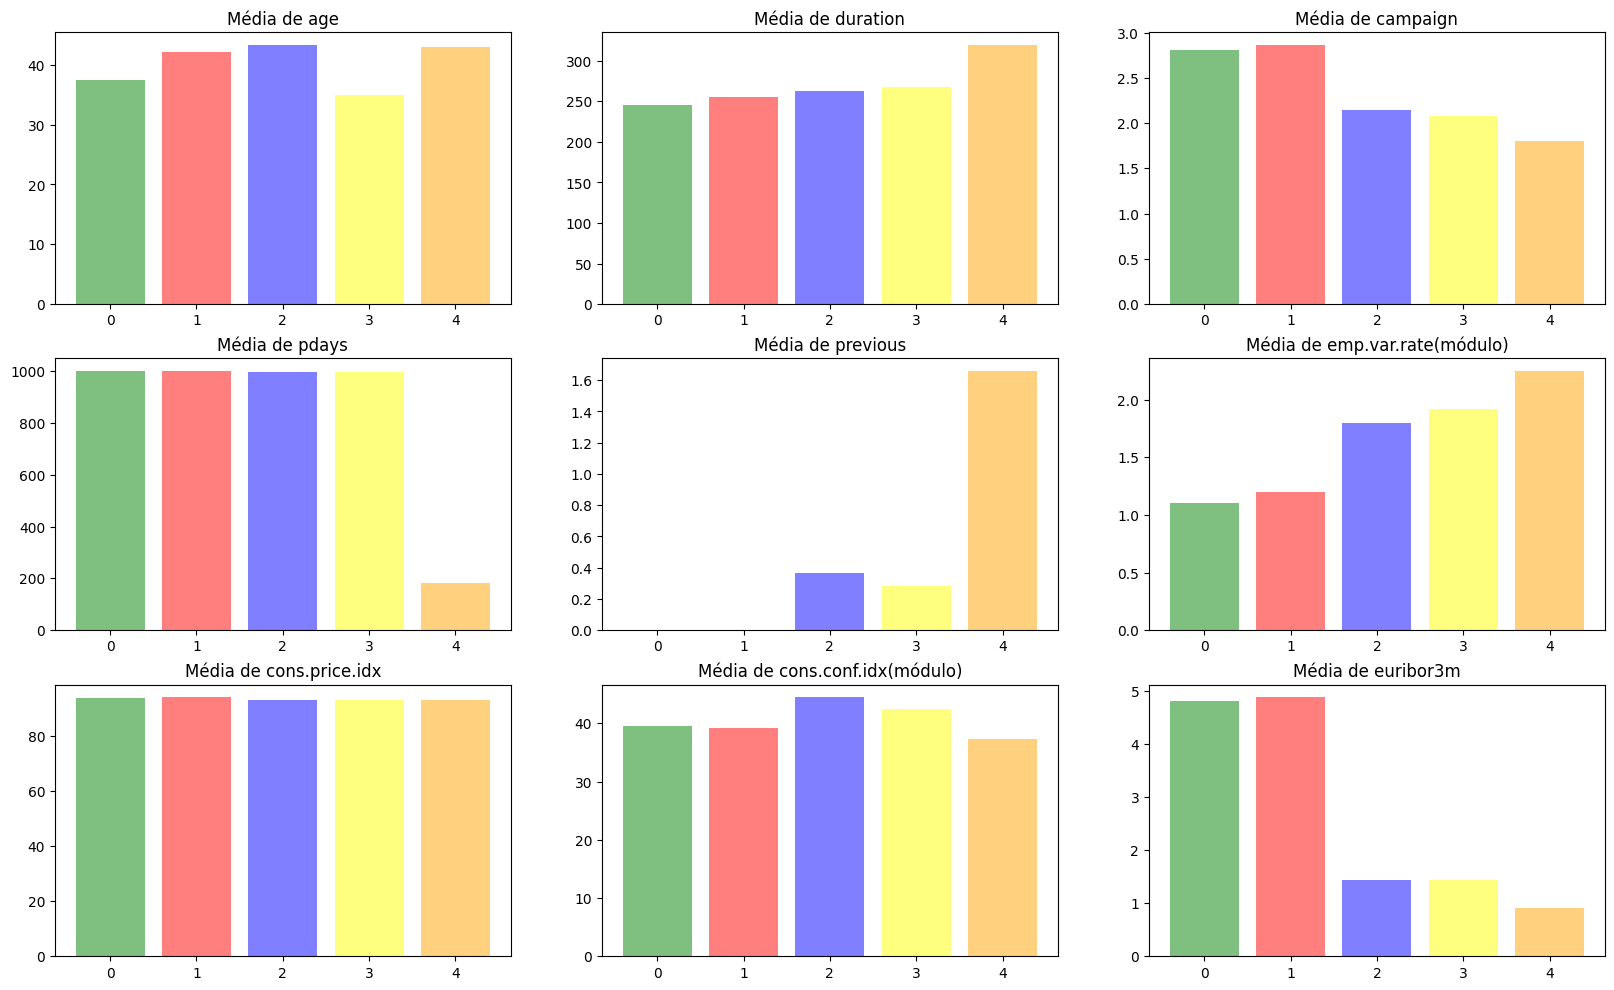

In [18]:
# Análise dos clusters

# Media de idade por cluster
plt.figure(figsize=(20, 12))

plt.subplot(3, 3, 1)
plot_cluster_bar('age')

# Media de duração por cluster
plt.subplot(3, 3, 2)
plot_cluster_bar('duration')

# Media de campanha por cluster
plt.subplot(3, 3, 3)
plot_cluster_bar('campaign')

# Media de pdays por cluster
plt.subplot(3, 3, 4)
plot_cluster_bar('pdays')

# Media de previous por cluster
plt.subplot(3, 3, 5)
plot_cluster_bar('previous')

# Media de emp.var.rate por cluster
plt.subplot(3, 3, 6)
plot_cluster_bar('emp.var.rate')

# Media de cons.price.idx por cluster
plt.subplot(3, 3, 7)
plot_cluster_bar('cons.price.idx')

# Media de cons.conf.idx por cluster
plt.subplot(3, 3, 8)
plot_cluster_bar('cons.conf.idx')

# Media de euribor3m por cluster

plt.subplot(3, 3, 9)
plot_cluster_bar('euribor3m')

plt.show()

Agora vendo algumas outras características do cluster 4 em comparação aos outros, vemos que são os que geralmente permanecem mais tempo numa ligação durante o contato com o banco, tem uma das maiores médias de idade, recebem menos contatos durante a campanha de marketing feita atualmente, porém antes dessa campanha foram os que já tinham recebido mais contatos.

## Outra análise do dataSet original será feita usando TNSE

TNSE é uma técnica de redução de dimensionalidade não linear bem poderosa, vamos usar o método TSNE do sklearn

C:\Users\Dom Ruan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


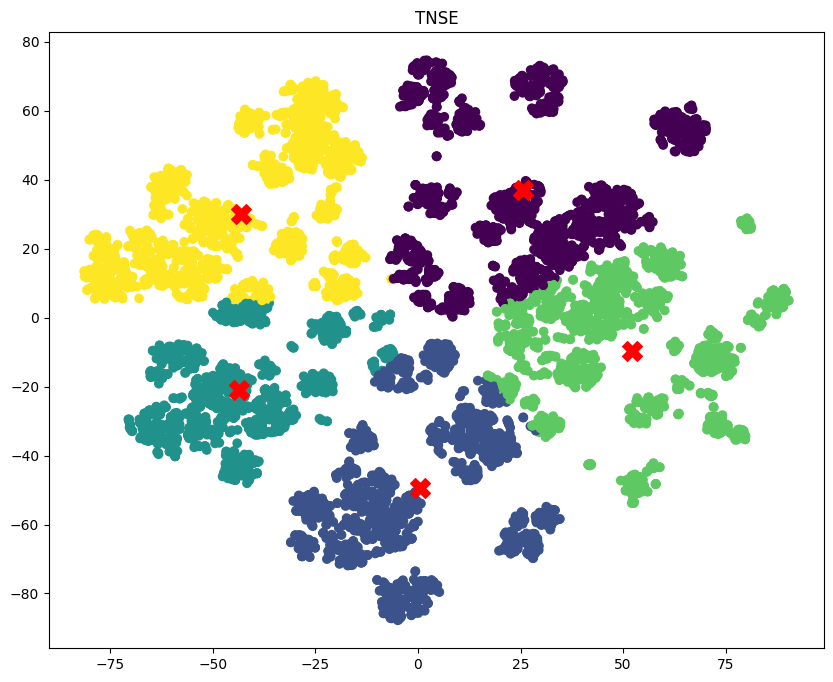

In [21]:
from sklearn.manifold import TSNE

# Normalizar os dados
scaler = StandardScaler()

# dado que temos o dataframe df_final, vamos aplicar o TSNE
# pegar uma mostra de 1000 linhas
X = df_final.copy()

# criar o pipeline
pipeline = Pipeline([
    ('scaler', scaler),
   ('TSNE', TSNE(n_components=2, perplexity=50, random_state=42))
])
X_sample = X.sample(10000)
# fit_transform
X_tsne = pipeline.fit_transform(X_sample)



# fit
kmeans.fit(X_tsne)
y_pred_1 = kmeans.predict(X_tsne)


# plotar o gráfico
# Plotar o gráfico
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred_1)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.title('TNSE')
plt.show()

Com o TNSE é possível ver que os clusters estão separados e mantém uma distância entre eles. Isso é bom, pois significa que os clusters estão bem definidos.